# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import datetime as dt
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao joao da barra
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | howrah
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | bomdila
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 11 of Set 1 | eraan
Processing Record 12 of Set 1 | port hedland
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | constantia
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | jamestow

Processing Record 39 of Set 4 | magadan
Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | new norfolk
Processing Record 42 of Set 4 | hayma'
City not found. Skipping...
Processing Record 43 of Set 4 | zhezqazghan
Processing Record 44 of Set 4 | karatsu
Processing Record 45 of Set 4 | katsuura
Processing Record 46 of Set 4 | chaplynka
Processing Record 47 of Set 4 | sault ste. marie
Processing Record 48 of Set 4 | banda aceh
Processing Record 49 of Set 4 | vorgashor
Processing Record 0 of Set 5 | novodvinsk
Processing Record 1 of Set 5 | vilyuchinsk
Processing Record 2 of Set 5 | ascencion de guarayos
City not found. Skipping...
Processing Record 3 of Set 5 | velikiy ustyug
Processing Record 4 of Set 5 | gizo
Processing Record 5 of Set 5 | fuvahmulah
City not found. Skipping...
Processing Record 6 of Set 5 | tezu
Processing Record 7 of Set 5 | rosarito
Processing Record 8 of Set 5 | vila velha
Processing Record 9 of Set 5 | faya-largeau
Processing Record 10 of Set

Processing Record 27 of Set 8 | gaiman
Processing Record 28 of Set 8 | laikit, laikit ii (dimembe)
Processing Record 29 of Set 8 | chemin grenier
Processing Record 30 of Set 8 | duong dong
Processing Record 31 of Set 8 | mutum
Processing Record 32 of Set 8 | parabel'
Processing Record 33 of Set 8 | chilecito
Processing Record 34 of Set 8 | touros
Processing Record 35 of Set 8 | thulamahashi
Processing Record 36 of Set 8 | labrador city
Processing Record 37 of Set 8 | kenai
Processing Record 38 of Set 8 | mutuali
Processing Record 39 of Set 8 | jayapura
Processing Record 40 of Set 8 | guerrero negro
Processing Record 41 of Set 8 | nabire
Processing Record 42 of Set 8 | imbituba
Processing Record 43 of Set 8 | tanah merah
Processing Record 44 of Set 8 | polyarnyy
Processing Record 45 of Set 8 | ancud
Processing Record 46 of Set 8 | onverwacht
Processing Record 47 of Set 8 | colchani
Processing Record 48 of Set 8 | saint-pierre-du-mont
Processing Record 49 of Set 8 | horasan
Processing Re

Processing Record 16 of Set 12 | babolsar
Processing Record 17 of Set 12 | takamaka
City not found. Skipping...
Processing Record 18 of Set 12 | kyzyl-burun
City not found. Skipping...
Processing Record 19 of Set 12 | broome
Processing Record 20 of Set 12 | aydarken
Processing Record 21 of Set 12 | colesberg
Processing Record 22 of Set 12 | puerto san carlos
City not found. Skipping...
Processing Record 23 of Set 12 | baukau
Processing Record 24 of Set 12 | suntar
Processing Record 25 of Set 12 | saint-felicien
Processing Record 26 of Set 12 | nema
Processing Record 27 of Set 12 | saintes
Processing Record 28 of Set 12 | ilha de mocambique
Processing Record 29 of Set 12 | aripuana
Processing Record 30 of Set 12 | santa maria
Processing Record 31 of Set 12 | carutapera
Processing Record 32 of Set 12 | east london
Processing Record 33 of Set 12 | nuuk
Processing Record 34 of Set 12 | sisimiut
Processing Record 35 of Set 12 | likiep
Processing Record 36 of Set 12 | nyurba
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao joao da barra,-21.6403,-41.0511,71.69,86,23,4.23,BR,1689634049
1,wailua homesteads,22.0669,-159.3780,84.99,70,40,16.11,US,1689634049
2,port mathurin,-19.6833,63.4167,74.08,79,56,27.96,MU,1689634050
3,avarua,-21.2078,-159.7750,71.65,88,100,2.30,CK,1689634050
4,howrah,22.5892,88.3103,80.60,100,40,4.61,IN,1689633927


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao joao da barra,-21.6403,-41.0511,71.69,86,23,4.23,BR,1689634049
1,wailua homesteads,22.0669,-159.3780,84.99,70,40,16.11,US,1689634049
2,port mathurin,-19.6833,63.4167,74.08,79,56,27.96,MU,1689634050
3,avarua,-21.2078,-159.7750,71.65,88,100,2.30,CK,1689634050
4,howrah,22.5892,88.3103,80.60,100,40,4.61,IN,1689633927


In [8]:
#Convert date to readable format
# https://www.geeksforgeeks.org/how-to-convert-timestamp-string-to-datetime-object-in-python/
# Assistance from peers and vol data dir

city_data_df["Date"]= dt.datetime.utcfromtimestamp(city_weather["dt"]+ city_weather["timezone"])
city_data_df["Date"]= city_data_df["Date"].dt.date

csv_file_path= os.path.join("cities.csv")
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

city_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao joao da barra,-21.6403,-41.0511,71.69,86,23,4.23,BR,2023-07-17
1,wailua homesteads,22.0669,-159.3780,84.99,70,40,16.11,US,2023-07-17
2,port mathurin,-19.6833,63.4167,74.08,79,56,27.96,MU,2023-07-17
3,avarua,-21.2078,-159.7750,71.65,88,100,2.30,CK,2023-07-17
4,howrah,22.5892,88.3103,80.60,100,40,4.61,IN,2023-07-17


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

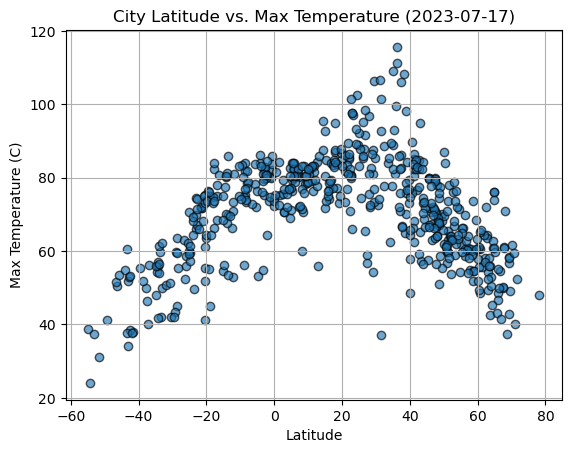

In [9]:
# Build scatter plot for latitude vs. temperature
# Module 5 - Day 1 - Activity 12
lat = city_df["Lat"]
temp = city_df["Max Temp"]
plt.scatter(lat, 
            temp,
            edgecolors="black",
            alpha=0.65
           )

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-07-17)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
# https://www.w3schools.com/python/matplotlib_grid.asp#:~:text=Add%20Grid%20Lines%20to%20a,grid%20lines%20to%20the%20plot.
plt.grid()
plt.show()

#### Latitude Vs. Humidity

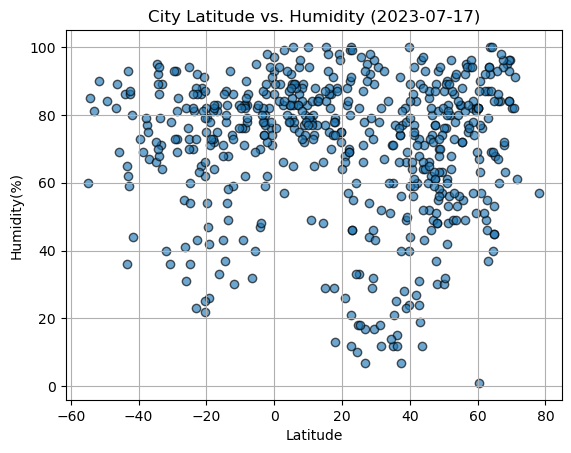

In [10]:
# Build the scatter plots for latitude vs. humidity
lat = city_df["Lat"]
hum = city_df["Humidity"]
plt.scatter(lat,
            hum,
            edgecolors="black",
            alpha=0.65
           )

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-07-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
# https://www.w3schools.com/python/matplotlib_grid.asp#:~:text=Add%20Grid%20Lines%20to%20a,grid%20lines%20to%20the%20plot.
plt.grid()
plt.show()

#### Latitude Vs. Cloudiness

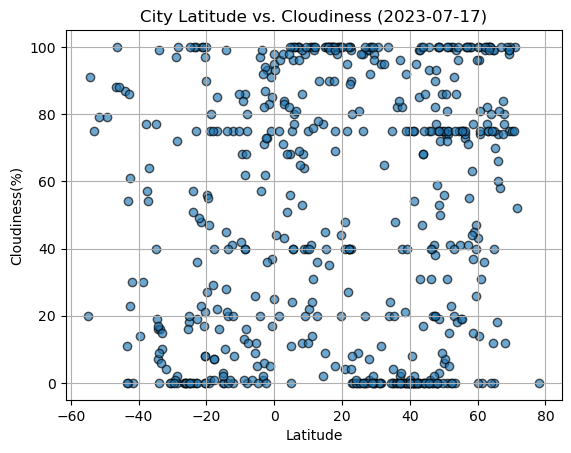

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_df["Lat"]
cloud = city_df["Cloudiness"]
plt.scatter(lat,
            cloud,
            edgecolors="black",
            alpha=0.65
           )

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-07-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
# https://www.w3schools.com/python/matplotlib_grid.asp#:~:text=Add%20Grid%20Lines%20to%20a,grid%20lines%20to%20the%20plot.
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

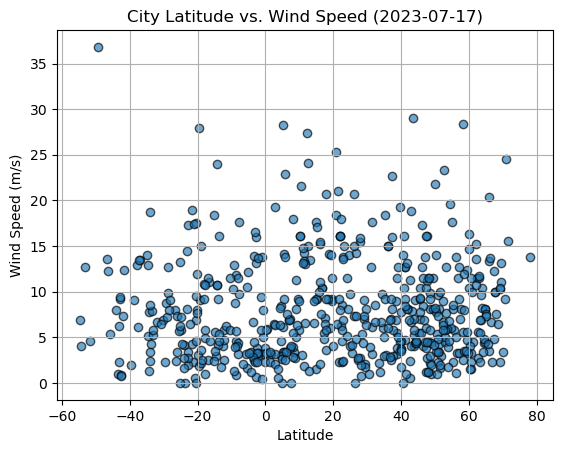

In [12]:
# Build the scatter plots for latitude vs. wind speed
lat = city_df["Lat"]
wind = city_df["Wind Speed"]
plt.scatter(lat,
            wind,
            edgecolors="black",
            alpha=0.65
           )

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-07-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
# https://www.w3schools.com/python/matplotlib_grid.asp#:~:text=Add%20Grid%20Lines%20to%20a,grid%20lines%20to%20the%20plot.
plt.grid()
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# Module 5 - Day 3 - Activity 8
# https://www.w3schools.com/python/python_ml_linear_regression.asp

def regress_line(x,y):
    slope, intercept, rvalue, pvalue, stderr= linregress(x,y)
    regress_line=  slope* x + intercept
    return regress_line

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
lat1 = city_df["Lat"] >= 0
northern_hemi_df = city_df[lat1]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,84.99,70,40,16.11,US,2023-07-17
4,howrah,22.5892,88.3103,80.60,100,40,4.61,IN,2023-07-17
7,bomdila,27.2500,92.4000,58.98,95,99,2.53,IN,2023-07-17
9,eraan,9.0629,117.7016,78.35,80,98,4.99,PH,2023-07-17
12,longyearbyen,78.2186,15.6401,48.04,57,0,13.80,SJ,2023-07-17


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
lat2 = city_df["Lat"] <= 0
southern_hemi_df = city_df[lat2]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao joao da barra,-21.6403,-41.0511,71.69,86,23,4.23,BR,2023-07-17
2,port mathurin,-19.6833,63.4167,74.08,79,56,27.96,MU,2023-07-17
3,avarua,-21.2078,-159.7750,71.65,88,100,2.30,CK,2023-07-17
5,edinburgh of the seven seas,-37.0676,-12.3116,56.07,67,64,13.49,SH,2023-07-17
6,adamstown,-25.0660,-130.1015,70.54,73,18,13.27,PN,2023-07-17


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.361355086955117


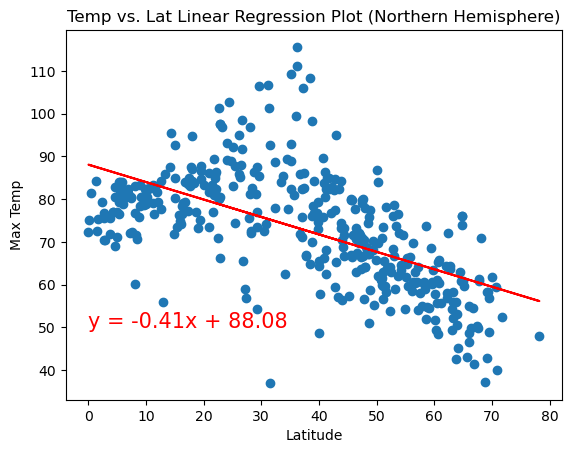

In [16]:
# Linear regression on Northern Hemisphere
# Module 5 - Day 3 - Activity 8
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Temp vs. Lat Linear Regression Plot (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6495487537638259


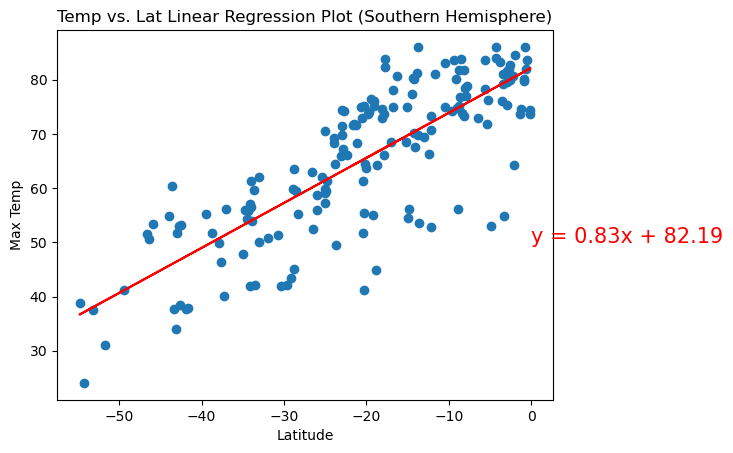

In [17]:
# Linear regression on Southern Hemisphere
# Module 5 - Day 3 - Activity 8
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Temp vs. Lat Linear Regression Plot (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there is a moderate negative correlation between latitude and max temperatures. In the southern hemisphere, there is a strong positive correlation between the two variables. As we move closer to the equator out of the southern hemisphere, the temperature will increase. The plot shows that temperature will increase as we move into the northern part and further away from the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.004792266322029945


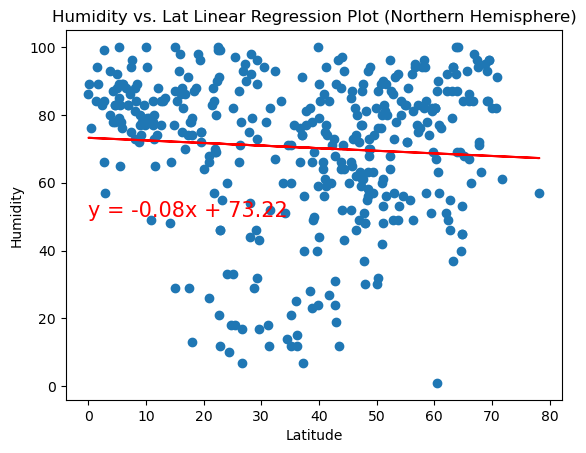

In [18]:
# Northern Hemisphere
# Module 5 - Day 3 - Activity 8
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Humidity vs. Lat Linear Regression Plot (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00036828269489443425


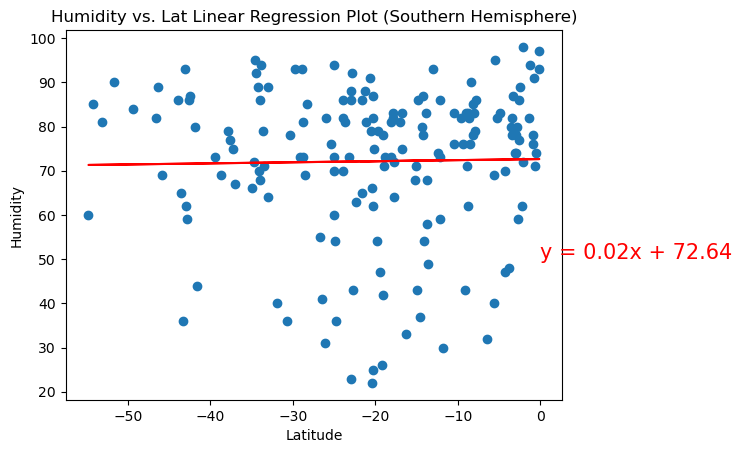

In [19]:
# Southern Hemisphere
# Module 5 - Day 3 - Activity 8
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Humidity vs. Lat Linear Regression Plot (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In both hemispheres, there is very minimal to no correlation between humidity and latitude. In the southern part, latitude almost does not have any indication of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0011073698667869493


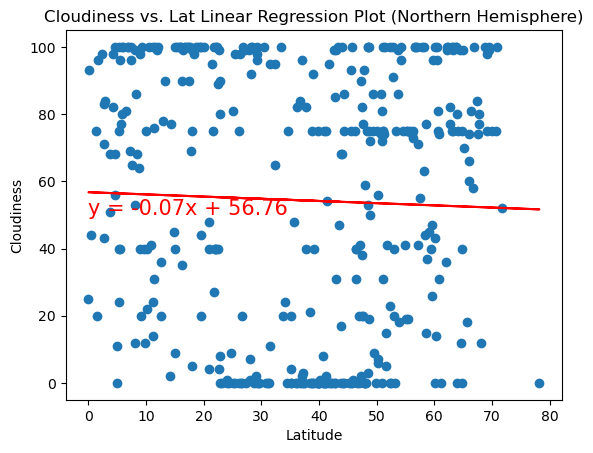

In [20]:
# Northern Hemisphere
# Module 5 - Day 3 - Activity 8
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Cloudiness vs. Lat Linear Regression Plot (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0023824678722716604


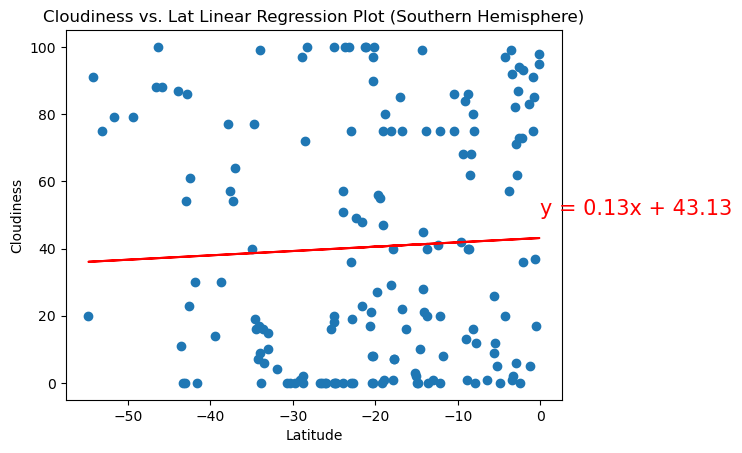

In [21]:
# Southern Hemisphere
# Module 5 - Day 3 - Activity 8
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Cloudiness vs. Lat Linear Regression Plot (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The southern hemisphere had a very slightly stronger correlation between latitude and cloudiness compared to the northern part. However, that does not mean the southern part as a strong correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.000962374098711144


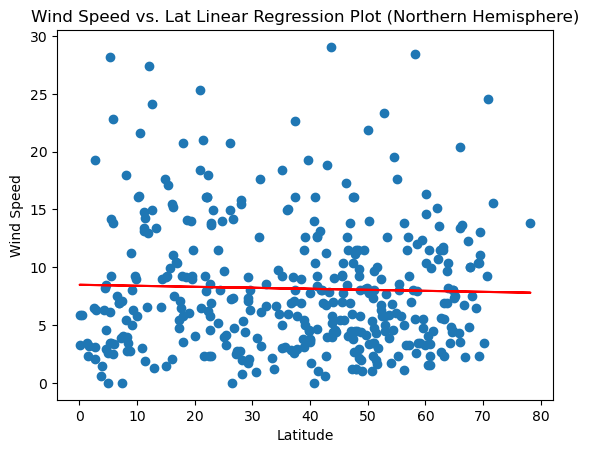

In [22]:
# Northern Hemisphere
# Module 5 - Day 3 - Activity 8
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Wind Speed vs. Lat Linear Regression Plot (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.015208270651069873


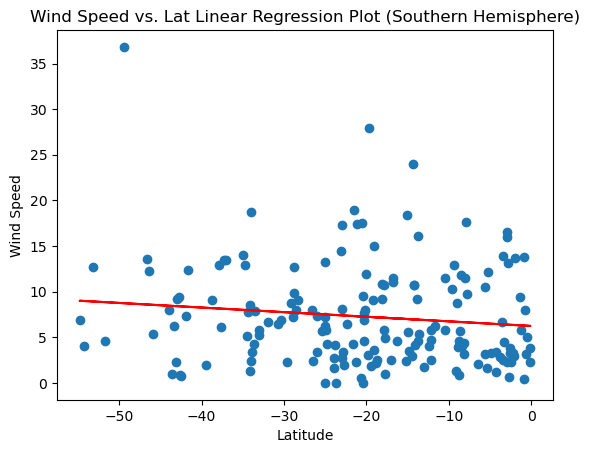

In [23]:
# Southern Hemisphere
# Module 5 - Day 3 - Activity 8
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Wind Speed vs. Lat Linear Regression Plot (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Based of the results of the r-square, there is a weak to almost no correlation between latitude and wind speed in both the northern and southern hemisphere. 